In [22]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [32]:
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [75]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("ensembl_fields.csv",
                 index_col=0,
                 parse_dates=[0],)
                 #date_parser=lambda d: datetime.strptime(d,"%d/%m/%Y"))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2017-11-12 to 2018-08-26
Data columns (total 27 columns):
ensembl._stats._count                                      44 non-null int64
ensembl._version                                           44 non-null int64
ensembl.gene.str._stats._count                             44 non-null int64
ensembl.list._stats._count                                 44 non-null int64
ensembl.list.gene.str._stats._count                        44 non-null int64
ensembl.list.protein.list._stats._count                    44 non-null int64
ensembl.list.protein.list.str._stats._count                44 non-null int64
ensembl.list.protein.str._stats._count                     44 non-null int64
ensembl.list.transcript.list._stats._count                 44 non-null int64
ensembl.list.transcript.list.str._stats._count             44 non-null int64
ensembl.list.transcript.str._stats._count                  44 non-null int64
ensembl.list.translation.list.

,ensembl._stats._count,ensembl._version,ensembl.gene.str._stats._count,ensembl.list._stats._count,ensembl.list.gene.str._stats._count,ensembl.list.protein.list._stats._count,ensembl.list.protein.list.str._stats._count,ensembl.list.protein.str._stats._count,ensembl.list.transcript.list._stats._count,ensembl.list.transcript.list.str._stats._count,...,ensembl.protein.str._stats._count,ensembl.transcript.list._stats._count,ensembl.transcript.list.str._stats._count,ensembl.transcript.str._stats._count,ensembl.translation.list._stats._count,ensembl.translation.list.protein.str._stats._count,ensembl.translation.list.rna.str._stats._count,ensembl.type_of_gene.list._stats._count,ensembl.type_of_gene.list.str._stats._count,ensembl.type_of_gene.str._stats._count
date,,,,,,,,,,,,,,,,,,,,,
2017-11-12,1953266,90,3896570,6371,32348,10322,65934,19486,12080,103746,...,2290744,624059,3125245,3272511,3896570,5906070,5906070,None,None,None
2017-11-19,1953266,90,3896553,6373,32366,10340,65988,19482,12098,103800,...,2288466,623321,3122113,3273232,3896553,5897156,5897156,None,None,None
2017-11-26,1953264,90,3896543,6374,32208,10330,65955,19334,12088,103767,...,2289056,623124,3121159,3273419,3896543,5897384,5897384,None,None,None
2017-12-03,1953264,90,3896545,6377,32416,10336,65976,19540,12094,103788,...,2291841,622821,3119899,3273724,3896545,5901694,5901694,None,None,None
2017-12-11,1953264,90,3896553,6380,32342,10336,65973,19462,12094,103785,...,2290280,623800,3124103,3272753,3896553,5902776,5902776,None,None,None


TypeError: 'module' object is not callable

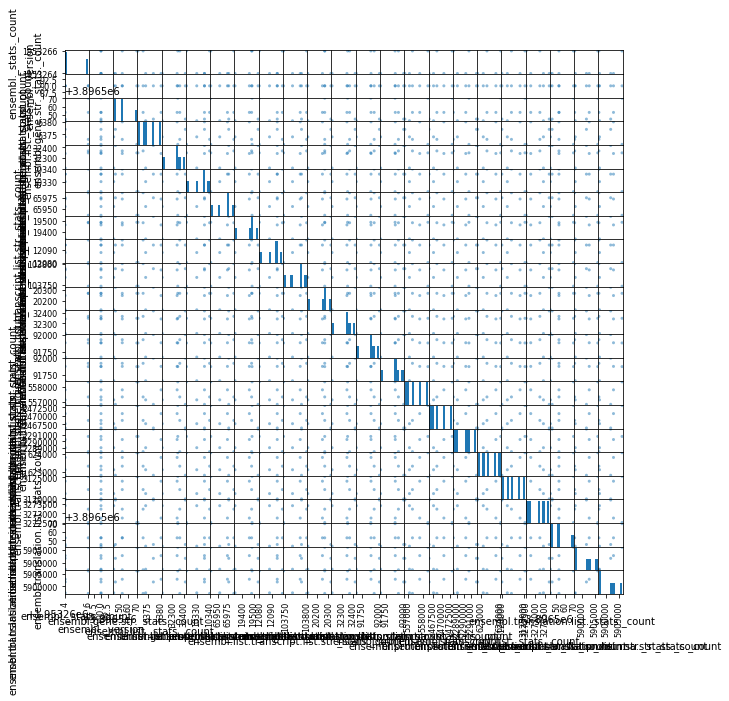

In [33]:
#df.plot()
sm = pd.plotting.scatter_matrix(df[:5],figsize=(10,10))
plt(sm)

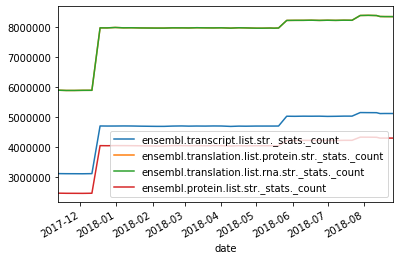

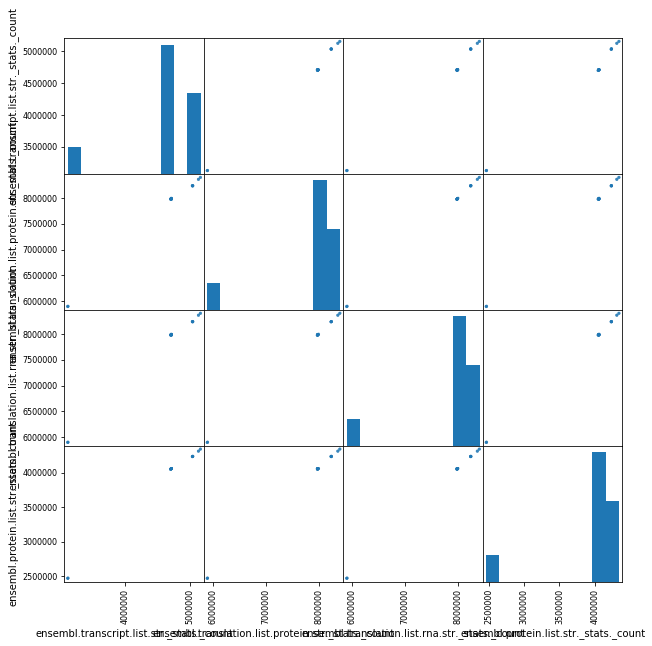

In [36]:
dfstruct = df[["ensembl.transcript.list.str._stats._count",
               "ensembl.translation.list.protein.str._stats._count",
               "ensembl.translation.list.rna.str._stats._count",
               "ensembl.protein.list.str._stats._count"]]

#ensembl.list.gene.str._stats._count                        44 non-null int64
#ensembl.list.protein.list._stats._count                    44 non-null int64
#ensembl.list.protein.list.str._stats._count                44 non-null int64
#ensembl.list.protein.str._stats._count                     44 non-null int64
#ensembl.list.transcript.list._stats._count                 44 non-null int64
#ensembl.list.transcript.list.str._stats._count             44 non-null int64
#ensembl.list.transcript.str._stats._count                  44 non-null int64
#ensembl.list.translation.list._stats._count                44 non-null int64
#ensembl.list.translation.list.protein.str._stats._count    44 non-null int64
#ensembl.list.translation.list.rna.str._stats._count        44 non-null int64
#ensembl.protein.list._stats._count                         44 non-null int64
#ensembl.protein.list.str._stats._count                     44 non-null int64
#ensembl.protein.str._stats._count                          44 non-null int64
#ensembl.transcript.list._stats._count                      44 non-null int64
#ensembl.transcript.list.str._stats._count                  44 non-null int64
#ensembl.transcript.str._stats._count                       44 non-null int64
#ensembl.translation.list._stats._count                     44 non-null int64
#ensembl.translation.list.protein.str._stats._count         44 non-null int64
#ensembl.translation.list.rna.str._stats._count             44 non-null int64
dfstruct.head()
dfstruct.plot()
sm = pd.plotting.scatter_matrix(dfstruct,figsize=(10,10))
#plt.plot(sm)

In [60]:
import statsmodels
coint_ok = statsmodels.tsa.stattools.coint(
    dfstruct["ensembl.transcript.list.str._stats._count"],
    dfstruct["ensembl.translation.list.rna.str._stats._count"],
    return_results=True)
print(coint_ok)
coint_nok = statsmodels.tsa.stattools.coint(
    dfstruct["ensembl.transcript.list.str._stats._count"],
    df["ensembl._stats._count"],
    return_results=True)
print(coint_nok)
coint_test = statsmodels.tsa.stattools.coint(
    df["ensembl._stats._count"],
    df["ensembl._stats._count"],
    return_results=True)
print(coint_test)
coint_nok

(-1.1297216787197375, 0.8753561890563435, array([-4.16926785, -3.48191545, -3.14455362]))
(-0.5495670251502834, 0.9606097809999988, array([-4.16926785, -3.48191545, -3.14455362]))
(-inf, 0.0, array([-4.16926785, -3.48191545, -3.14455362]))


In [94]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
n = dfstruct[["ensembl.transcript.list.str._stats._count","ensembl.translation.list.rna.str._stats._count"]]
r = coint_johansen(n,-1,1).eig
print(r)

[0.17996218 0.02058076]


date
2017-11-12    2780825
2017-11-19    2775043
2017-11-26    2776225
2017-12-03    2781795
2017-12-11    2778673
dtype: int64


,coef,std err,z,P>|z|,[0.025,0.975]
L1.ensembl.transcript.list.str._stats._count.ensembl.transcript.list.str._stats,0.6138,1.670,0.367,0.713,-2.660,3.888
L1.ensembl.translation.list.rna.str._stats._count.ensembl.transcript.list.str._stats,-0.4983,1.293,-0.385,0.700,-3.032,2.036
,coef,std err,z,P>|z|,[0.025,0.975]
L1.ensembl.transcript.list.str._stats._count.ensembl.translation.list.rna.str._stats,0.8967,2.161,0.415,0.678,-3.338,5.132
L1.ensembl.translation.list.rna.str._stats._count.ensembl.translation.list.rna.str._stats,-0.7222,1.672,-0.432,0.666,-4.000,2.556
,coef,std err,z,P>|z|,[0.025,0.975]
ec1.ensembl.transcript.list.str._stats,-0.6697,0.221,-3.036,0.002,-1.102,-0.237
,coef,std err,z,P>|z|,[0.025,0.975]
ec1.ensembl.translation.list.rna.str._stats,-0.8623,0.285,-3.022,0.003,-1.421,-0.303
,coef,std err,z,P>|z|,[0.025,0.975]


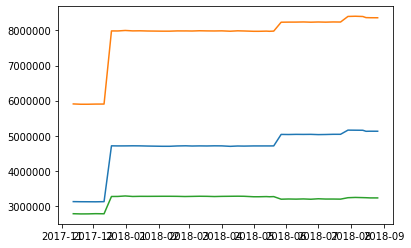

In [105]:
from statsmodels.tsa.vector_ar.vecm import VECM
n = dfstruct[["ensembl.transcript.list.str._stats._count","ensembl.translation.list.rna.str._stats._count"]]
plt.plot(n)
diffn = dfstruct["ensembl.transcript.list.str._stats._count"] - \
        dfstruct["ensembl.translation.list.rna.str._stats._count"]
diffn = pd.DataFrame.abs(diffn)
print(diffn.head())
plt.plot(diffn)
m = VECM(n)
r = m.fit()
r.summary()

In [114]:
for i in dfstruct:
    for j in dfstruct:
        if i == j:
            continue
        res = statsmodels.tsa.stattools.coint(dfstruct[i],dfstruct[j])
        print("%s %s: %s" % (i,j,res))
print(dfstruct["ensembl.translation.list.protein.str._stats._count"].head())
print(dfstruct["ensembl.translation.list.rna.str._stats._count"])

ensembl.transcript.list.str._stats._count ensembl.translation.list.protein.str._stats._count: (-1.1297216787197375, 0.8753561890563435, array([-4.16926785, -3.48191545, -3.14455362]))
ensembl.transcript.list.str._stats._count ensembl.translation.list.rna.str._stats._count: (-1.1297216787197375, 0.8753561890563435, array([-4.16926785, -3.48191545, -3.14455362]))
ensembl.transcript.list.str._stats._count ensembl.protein.list.str._stats._count: (-0.9569068979594471, 0.9107201146272732, array([-4.16926785, -3.48191545, -3.14455362]))
ensembl.translation.list.protein.str._stats._count ensembl.transcript.list.str._stats._count: (-1.3002804024559942, 0.8296510065871301, array([-4.16926785, -3.48191545, -3.14455362]))
ensembl.translation.list.protein.str._stats._count ensembl.translation.list.rna.str._stats._count: (-inf, 0.0, array([-4.16926785, -3.48191545, -3.14455362]))
ensembl.translation.list.protein.str._stats._count ensembl.protein.list.str._stats._count: (-1.171318873077731, 0.8652519